# TF-IDF Scripts

### Import Libraries

In [178]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk import word_tokenize, pos_tag_sents, pos_tag
import re
from bs4 import BeautifulSoup
import unicodedata
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from string import punctuation
import os, glob
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

import sys
!{sys.executable} -m pip install detoxify

from detoxify import Detoxify
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kylet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kylet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kylet\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Custom Functions and File Imports

In [179]:
stemming = PorterStemmer()
stops = set(stopwords.words("english")) 
counters = []

def removeStopWords(row):
    stemmed = row['stemmed']
    cleaned = [w for w in stemmed if not w in stops]
    cleaned = listToString(cleaned)
    return cleaned

def tokenize(row):
    message = row['message'].lower()
    tokens = word_tokenize(message)
    tok_words = [w for w in tokens if w.isalpha()]
    return tok_words
    
def stem(row):
    tokens = row['tokenized']
    stemmed = [stemming.stem(word) for word in tokens]
    return stemmed

def listToString(lst):
    text = ' '.join(lst)
    return text

def posTag(row):
    message = row['message']
    tokens = word_tokenize(message)
    tagged = nltk.pos_tag(tokens)
    return tagged

def posCounter(row):
    message = row['message']
    tokens = word_tokenize(message)
    tagged = nltk.pos_tag(tokens)
    counts = Counter( tag for word,  tag in tagged)
    counters.append(counts)

In [180]:
os.chdir(r"D:\Programs\Jupyter Notebooks\Thesis RIP Scripts\Annotations\usanews0") # CHANGE VALUE PER BATCH
files = []
for file in glob.glob("*.csv"):
    print(file)
    files.append(file)
    
print(files)    

annotatorA.csv
annotatorB.csv
annotatorC.csv
['annotatorA.csv', 'annotatorB.csv', 'annotatorC.csv']


In [181]:
coder1 = pd.read_csv(files[0])
coder1.fillna(0)
coder2 = pd.read_csv(files[1])
coder2.fillna(0)
#coder3 = pd.read_excel('usanews0full_3.xlsx')
coder3 = pd.read_csv(files[2])
coder3.fillna(0)

,Unnamed: 0,message,author,time_text,Direct Harassment,Hate Speech,Sexual Harassment,Trolling,Others,Toxic
0,0,DEMOCRATS ARE TERRORISTS!,username@UmmZJSZ SJ,0:00,0,1.0,0.0,0.0,0.0,0.0
1,1,"Let's be honest, they aren't voting for Biden,...",username@o LuhetsoK,0:00,0,0.0,0.0,1.0,0.0,0.0
2,2,Where would we be if not for RSBN?,username@nVeMXVeeeV,0:00,0,0.0,0.0,0.0,0.0,0.0
3,3,THEY WON'T BE HAPPY WHEN THEY ARE REGULATED 😛😛😥,username@oaal FsaJ,0:02,0,1.0,0.0,1.0,0.0,0.0
4,4,TRUMP 2020,username@PdPPidldii,0:03,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
16678,39361,OUR VOTES WILL DRAIN THE SWAMP,username@ePeuuaute,3:01:25,0,0.0,0.0,0.0,0.0,0.0
16679,39362,"Biden MAY BE elected president Tuesday, BUT if...",username@aooa fe aa,3:01:25,0,0.0,0.0,0.0,0.0,0.0
16680,39363,Trump 2020,username@Co tntEiin,3:01:25,0,0.0,0.0,0.0,0.0,0.0
16681,39364,I DON'T WANT NO WOMAN FOR PRESIDENT!!!!!,username@MMLMLMLLLM,3:01:25,0,1.0,0.0,0.0,0.0,0.0


### Combine Documents Per Label

In [182]:
dHarassment = pd.DataFrame()
temp0 = coder1.loc[coder1['Direct Harassment'] == 1.0]
temp1 = coder2.loc[coder2['Direct Harassment'] == 1.0]
temp2 = coder3.loc[coder3['Direct Harassment'] == 1.0]

dHarassment = pd.concat([temp0, temp1, temp2])
dHarassment.drop(dHarassment.columns.difference(['Unnamed: 0', 'message','Direct Harassment']), 1, inplace=True)

dHarassment.drop_duplicates(subset ="message", keep = False, inplace = True)
dHarassment
#duplicateRowsDF = dHarassment[dHarassment.duplicated()]
#duplicateRowsDF

,Unnamed: 0,message,Direct Harassment
9,9,💙 BIDE‎N FO‍R RACISM! 💙,1.0
13,13,Hunter Buyden MIA,1.0
34,34,HUNTER & BIGFOOT SPOTTED🚨,1.0
35,35,Trump was slandered as a racist Slanderers per...,1.0
62,62,Shallow!,1.0
...,...,...,...
16508,39191,The LIKES have it the COMMUNIST Trolls loose,1.0
16588,39271,CREEPY. JðŸ¤ªE. BIDEN,1.0
16605,39288,This song is so trump. Go gays! God and trump ...,1.0
16614,39297,ONe More DAY oF TRuMP,1.0


In [183]:
hSpeech = pd.DataFrame()
temp0 = coder1.loc[coder1['Hate Speech'] == 1.0]
temp1 = coder2.loc[coder2['Hate Speech'] == 1.0]
temp2 = coder3.loc[coder3['Hate Speech'] == 1.0]

hSpeech = pd.concat([temp0, temp1, temp2])
hSpeech.drop(hSpeech.columns.difference(['Unnamed: 0', 'message','Hate Speech']), 1, inplace=True)

hSpeech.drop_duplicates(subset ="message", keep = False, inplace = True)
hSpeech

,Unnamed: 0,message,Hate Speech
3065,3065,FAKE POLLS,1.0
3118,3118,":dothefive::dothefive:BIDEN ""THE BIG GUY"" IS A...",1.0
3191,3191,BIDEN CRIME FAMILY FOR PRISON,1.0
3523,3523,Lady Gaga SUXXS,1.0
3763,3763,Biden is a virus,1.0
...,...,...,...
14642,14642,MOUTH BREATHERS FOR JOE. ðŸ˜§,1.0
14689,14689,Biden & Kamala both connected to taking money ...,1.0
14745,14745,open borders for biden- free stuff for illegal...,1.0
14874,14874,pure Michigan sky,1.0


In [184]:
sHarassment = pd.DataFrame()
temp0 = coder1.loc[coder1['Sexual Harassment'] == 1.0]
temp1 = coder2.loc[coder2['Sexual Harassment'] == 1.0]
temp2 = coder3.loc[coder3['Sexual Harassment'] == 1.0]

sHarassment = pd.concat([temp0, temp1, temp2])
sHarassment.drop(sHarassment.columns.difference(['Unnamed: 0', 'message','Sexual Harassment']), 1, inplace=True)

sHarassment.drop_duplicates(subset ="message", keep = False, inplace = True)
sHarassment

,Unnamed: 0,message,Sexual Harassment
3145,3145,this bitch stupid,1.0
3327,3327,IF YOU VOTE DONALD TRUMPS UR GAYYYYY!!!!,1.0
3552,3552,Biden for Incest 2020,1.0
3882,3882,Democrats for Pedophiles and Fake Blacks,1.0
3983,3983,black trans for trump!!!,1.0
...,...,...,...
11171,11171,ðŸ¦¶HUNTERS FOOTJOBS MATTER ðŸŒ,1.0
12196,12196,SMASH THAT ðŸ‘ðŸ‘ðŸ‘ðŸ‘ðŸ‘ðŸ‘ðŸ‘ðŸ‘ðŸ‘...,1.0
12572,12572,"REALLY I LOE PENCE, I WOULD LIKE TO GET MARRY ...",1.0
13247,13247,hello micheal pence i bring you gift of daughter,1.0


In [185]:
trolling = pd.DataFrame()
temp0 = coder1.loc[coder1['Trolling'] == 1.0]
temp1 = coder2.loc[coder2['Trolling'] == 1.0]
temp2 = coder3.loc[coder3['Trolling'] == 1.0]

trolling = pd.concat([temp0, temp1, temp2])
trolling.drop(trolling.columns.difference(['Unnamed: 0', 'message','Trolling']), 1, inplace=True)

trolling.drop_duplicates(subset ="message", keep = False, inplace = True)
trolling

,Unnamed: 0,message,Trolling
14,14,"Yes, vote then next week- start Trump Victory ...",1.0
15,15,"🥊Round 3 of 5🥊🛎ding,ding",1.0
16,16,God bless our dear president and our great cou...,1.0
19,19,🔴🔴🔴🔴🔴🔴🔴BIGFOOT FOR TRUMP2020PENCE🔴🔴🔴🔴🔴🔴🔴,1.0
20,20,I'm from a state that has voted in only one Re...,1.0
...,...,...,...
16434,39117,CORNPOP HAD A CHILD NAMED KAMALA,1.0
16539,39222,America is already communist,1.0
16607,39290,BIDEN 2020 : MAKE ISIS GREAT AGAIN,1.0
16637,39320,Vicente charles montoya I using an illegal eli...,1.0


In [186]:
others = pd.DataFrame()
temp0 = coder1.loc[coder1['Others'] == 1.0]
temp1 = coder2.loc[coder2['Others'] == 1.0]
temp2 = coder3.loc[coder3['Others'] == 1.0]

others = pd.concat([temp0, temp1, temp2])
others.drop(others.columns.difference(['Unnamed: 0', 'message','Others']), 1, inplace=True)

others.drop_duplicates(subset ="message", keep = False, inplace = True)
others

,Unnamed: 0,message,Others
11,11,The Porn Industry is censoring and taking down...,1.0
3019,3019,"AF1 = whichever plane the president is on, cou...",1.0
3031,3031,Trump 2020 send China virus and China joe pack...,1.0
3090,3090,biden for prison,1.0
3155,3155,they all abouta catch COVID,1.0
...,...,...,...
11282,11282,ALL ON HERE SHOULD TERROEIZE THE DEMOCRATS ON ...,1.0
11401,11401,WHOEVER VOTES BIDEN NEEDS TO GO TO A JAIL CELL...,1.0
11552,11552,"IF BIDEN MENTIONED GOD, HE WOULD BURST INTO FL...",1.0
11811,11811,PUT RIOTERS IN PRISON,1.0


In [187]:
toxic = pd.DataFrame()
temp0 = coder1.loc[coder1['Toxic'] == 1.0]
temp1 = coder2.loc[coder2['Toxic'] == 1.0]
temp2 = coder3.loc[coder3['Toxic'] == 1.0]

toxic = pd.concat([temp0, temp1, temp2])
toxic.drop(toxic.columns.difference(['Unnamed: 0', 'message','Toxic']), 1, inplace=True)

toxic.drop_duplicates(subset ="message", keep = False, inplace = True)
toxic

,Unnamed: 0,message,Toxic
9,9,💙 BIDE‎N FO‍R RACISM! 💙,1.0
43,43,DEMOCRATS LIES ON VILE MEDIA. ABOUT EVERYTHING...,1.0
309,309,"𝗜𝗡 𝗚𝗢𝗗 𝐖𝗘 𝗧𝗥𝗨𝗦𝗧 ,𝗗𝗘𝗙𝗘𝗔𝗧 J𝗢𝗘 𝐖𝗘 𝗠𝗨𝗦𝗧",1.0
320,320,ITS ALL SO FAKE,1.0
424,424,Throw Peters out! Vote John James tomorrow!!,1.0
...,...,...,...
14910,14910,8===3 JOE BIDEN,1.0
14959,14959,ðŸ‘FRIENDS DON'T LET FRIENDS VOTE FOR A CAREE...,1.0
14960,14960,"Pelosi, Schumer, Feinschtein, Biden, Leahy and...",1.0
14969,14969,CLOWN,1.0


## NLP Text Processing Stuff


In [188]:
dHarassment['tokenized'] = dHarassment.apply(tokenize, axis=1)
dHarassment['stemmed'] = dHarassment.apply(stem, axis=1)
dHarassment['stop_words'] = dHarassment.apply(removeStopWords, axis=1)
dHarassment

,Unnamed: 0,message,Direct Harassment,tokenized,stemmed,stop_words
9,9,💙 BIDE‎N FO‍R RACISM! 💙,1.0,[racism],[racism],racism
13,13,Hunter Buyden MIA,1.0,"[hunter, buyden, mia]","[hunter, buyden, mia]",hunter buyden mia
34,34,HUNTER & BIGFOOT SPOTTED🚨,1.0,"[hunter, bigfoot]","[hunter, bigfoot]",hunter bigfoot
35,35,Trump was slandered as a racist Slanderers per...,1.0,"[trump, was, slandered, as, a, racist, slander...","[trump, wa, slander, as, a, racist, slander, p...",trump wa slander racist slander perish ed elij...
62,62,Shallow!,1.0,[shallow],[shallow],shallow
...,...,...,...,...,...,...
16508,39191,The LIKES have it the COMMUNIST Trolls loose,1.0,"[the, likes, have, it, the, communist, trolls,...","[the, like, have, it, the, communist, troll, l...",like communist troll loos
16588,39271,CREEPY. JðŸ¤ªE. BIDEN,1.0,"[creepy, biden]","[creepi, biden]",creepi biden
16605,39288,This song is so trump. Go gays! God and trump ...,1.0,"[this, song, is, so, trump, go, gays, god, and...","[thi, song, is, so, trump, go, gay, god, and, ...",thi song trump go gay god trump love gay love
16614,39297,ONe More DAY oF TRuMP,1.0,"[one, more, day, of, trump]","[one, more, day, of, trump]",one day trump


In [189]:
hSpeech['tokenized'] = hSpeech.apply(tokenize, axis=1)
hSpeech['stemmed'] = hSpeech.apply(stem, axis=1)
hSpeech['stop_words'] = hSpeech.apply(removeStopWords, axis=1)
hSpeech

,Unnamed: 0,message,Hate Speech,tokenized,stemmed,stop_words
3065,3065,FAKE POLLS,1.0,"[fake, polls]","[fake, poll]",fake poll
3118,3118,":dothefive::dothefive:BIDEN ""THE BIG GUY"" IS A...",1.0,"[dothefive, biden, the, big, guy, is, a, corru...","[dothef, biden, the, big, guy, is, a, corrupt,...",dothef biden big guy corrupt sinal traitor ccp...
3191,3191,BIDEN CRIME FAMILY FOR PRISON,1.0,"[biden, crime, family, for, prison]","[biden, crime, famili, for, prison]",biden crime famili prison
3523,3523,Lady Gaga SUXXS,1.0,"[lady, gaga, suxxs]","[ladi, gaga, suxx]",ladi gaga suxx
3763,3763,Biden is a virus,1.0,"[biden, is, a, virus]","[biden, is, a, viru]",biden viru
...,...,...,...,...,...,...
14642,14642,MOUTH BREATHERS FOR JOE. ðŸ˜§,1.0,"[mouth, breathers, for, joe]","[mouth, breather, for, joe]",mouth breather joe
14689,14689,Biden & Kamala both connected to taking money ...,1.0,"[biden, kamala, both, connected, to, taking, m...","[biden, kamala, both, connect, to, take, money...",biden kamala connect take money china even run
14745,14745,open borders for biden- free stuff for illegal...,1.0,"[open, borders, for, free, stuff, for, illegal...","[open, border, for, free, stuff, for, illeg, f...",open border free stuff illeg biden
14874,14874,pure Michigan sky,1.0,"[pure, michigan, sky]","[pure, michigan, sky]",pure michigan sky


In [190]:
sHarassment['tokenized'] = sHarassment.apply(tokenize, axis=1)
sHarassment['stemmed'] = sHarassment.apply(stem, axis=1)
sHarassment['stop_words'] = sHarassment.apply(removeStopWords, axis=1)
sHarassment

,Unnamed: 0,message,Sexual Harassment,tokenized,stemmed,stop_words
3145,3145,this bitch stupid,1.0,"[this, bitch, stupid]","[thi, bitch, stupid]",thi bitch stupid
3327,3327,IF YOU VOTE DONALD TRUMPS UR GAYYYYY!!!!,1.0,"[if, you, vote, donald, trumps, ur, gayyyyy]","[if, you, vote, donald, trump, ur, gayyyyy]",vote donald trump ur gayyyyy
3552,3552,Biden for Incest 2020,1.0,"[biden, for, incest]","[biden, for, incest]",biden incest
3882,3882,Democrats for Pedophiles and Fake Blacks,1.0,"[democrats, for, pedophiles, and, fake, blacks]","[democrat, for, pedophil, and, fake, black]",democrat pedophil fake black
3983,3983,black trans for trump!!!,1.0,"[black, trans, for, trump]","[black, tran, for, trump]",black tran trump
...,...,...,...,...,...,...
11171,11171,ðŸ¦¶HUNTERS FOOTJOBS MATTER ðŸŒ,1.0,"[footjobs, matter]","[footjob, matter]",footjob matter
12196,12196,SMASH THAT ðŸ‘ðŸ‘ðŸ‘ðŸ‘ðŸ‘ðŸ‘ðŸ‘ðŸ‘ðŸ‘...,1.0,"[smash, that, ðÿ, button]","[smash, that, ðÿ, button]",smash ðÿ button
12572,12572,"REALLY I LOE PENCE, I WOULD LIKE TO GET MARRY ...",1.0,"[really, i, loe, pence, i, would, like, to, ge...","[realli, i, loe, penc, i, would, like, to, get...",realli loe penc would like get marri bello
13247,13247,hello micheal pence i bring you gift of daughter,1.0,"[hello, micheal, pence, i, bring, you, gift, o...","[hello, micheal, penc, i, bring, you, gift, of...",hello micheal penc bring gift daughter


In [191]:
trolling['tokenized'] = trolling.apply(tokenize, axis=1)
trolling['stemmed'] = trolling.apply(stem, axis=1)
trolling['stop_words'] = trolling.apply(removeStopWords, axis=1)
trolling

,Unnamed: 0,message,Trolling,tokenized,stemmed,stop_words
14,14,"Yes, vote then next week- start Trump Victory ...",1.0,"[yes, vote, then, next, start, trump, victory,...","[ye, vote, then, next, start, trump, victori, ...",ye vote next start trump victori tour ralli
15,15,"🥊Round 3 of 5🥊🛎ding,ding",1.0,"[of, ding]","[of, ding]",ding
16,16,God bless our dear president and our great cou...,1.0,"[god, bless, our, dear, president, and, our, g...","[god, bless, our, dear, presid, and, our, grea...",god bless dear presid great countri democrat y...
19,19,🔴🔴🔴🔴🔴🔴🔴BIGFOOT FOR TRUMP2020PENCE🔴🔴🔴🔴🔴🔴🔴,1.0,[for],[for],
20,20,I'm from a state that has voted in only one Re...,1.0,"[i, from, a, state, that, has, voted, in, only...","[i, from, a, state, that, ha, vote, in, onli, ...",state ha vote onli one republican governor his...
...,...,...,...,...,...,...
16434,39117,CORNPOP HAD A CHILD NAMED KAMALA,1.0,"[cornpop, had, a, child, named, kamala]","[cornpop, had, a, child, name, kamala]",cornpop child name kamala
16539,39222,America is already communist,1.0,"[america, is, already, communist]","[america, is, alreadi, communist]",america alreadi communist
16607,39290,BIDEN 2020 : MAKE ISIS GREAT AGAIN,1.0,"[biden, make, isis, great, again]","[biden, make, isi, great, again]",biden make isi great
16637,39320,Vicente charles montoya I using an illegal eli...,1.0,"[vicente, charles, montoya, i, using, an, ille...","[vicent, charl, montoya, i, use, an, illeg, el...",vicent charl montoya use illeg elit devic hack...


In [192]:
others['tokenized'] = others.apply(tokenize, axis=1)
others['stemmed'] = others.apply(stem, axis=1)
others['stop_words'] = others.apply(removeStopWords, axis=1)
others

,Unnamed: 0,message,Others,tokenized,stemmed,stop_words
11,11,The Porn Industry is censoring and taking down...,1.0,"[the, porn, industry, is, censoring, and, taki...","[the, porn, industri, is, censor, and, take, d...",porn industri censor take hunter biden video p...
3019,3019,"AF1 = whichever plane the president is on, cou...",1.0,"[whichever, plane, the, president, is, on, cou...","[whichev, plane, the, presid, is, on, could, b...",whichev plane presid could crop duster would s...
3031,3031,Trump 2020 send China virus and China joe pack...,1.0,"[trump, send, china, virus, and, china, joe, p...","[trump, send, china, viru, and, china, joe, pa...",trump send china viru china joe pack pleas
3090,3090,biden for prison,1.0,"[biden, for, prison]","[biden, for, prison]",biden prison
3155,3155,they all abouta catch COVID,1.0,"[they, all, abouta, catch, covid]","[they, all, abouta, catch, covid]",abouta catch covid
...,...,...,...,...,...,...
11282,11282,ALL ON HERE SHOULD TERROEIZE THE DEMOCRATS ON ...,1.0,"[all, on, here, should, terroeize, the, democr...","[all, on, here, should, terroeiz, the, democra...",terroeiz democrat twitter
11401,11401,WHOEVER VOTES BIDEN NEEDS TO GO TO A JAIL CELL...,1.0,"[whoever, votes, biden, needs, to, go, to, a, ...","[whoever, vote, biden, need, to, go, to, a, ja...",whoever vote biden need go jail cell go bald
11552,11552,"IF BIDEN MENTIONED GOD, HE WOULD BURST INTO FL...",1.0,"[if, biden, mentioned, god, he, would, burst, ...","[if, biden, mention, god, he, would, burst, in...",biden mention god would burst flame ðÿ
11811,11811,PUT RIOTERS IN PRISON,1.0,"[put, rioters, in, prison]","[put, rioter, in, prison]",put rioter prison


In [193]:
toxic['tokenized'] = toxic.apply(tokenize, axis=1)
toxic['stemmed'] = toxic.apply(stem, axis=1)
toxic['stop_words'] = toxic.apply(removeStopWords, axis=1)
toxic['pos'] = toxic.apply(posTag, axis=1)
toxic.apply(posCounter, axis=1)
print(sum(counters, Counter()))
toxic

Counter({'NNP': 6891, '.': 1971, 'NN': 1761, 'IN': 743, 'JJ': 727, 'DT': 667, 'NNS': 441, 'VB': 401, 'VBZ': 392, 'PRP': 367, 'VBP': 346, 'RB': 332, 'CD': 300, ',': 253, 'CC': 245, ':': 206, 'VBD': 168, 'TO': 152, 'VBG': 150, 'MD': 129, 'PRP$': 122, 'VBN': 79, 'POS': 77, 'RP': 64, '``': 63, 'NNPS': 51, 'WP': 47, '$': 40, 'WRB': 33, "''": 31, '#': 28, 'JJR': 21, 'UH': 20, 'WDT': 17, '(': 16, ')': 16, 'JJS': 12, 'EX': 11, 'PDT': 11, 'RBR': 10, 'RBS': 3, 'FW': 3})


,Unnamed: 0,message,Toxic,tokenized,stemmed,stop_words,pos
9,9,💙 BIDE‎N FO‍R RACISM! 💙,1.0,[racism],[racism],racism,"[(💙, JJ), (BIDE‎N, NNP), (FO‍R, NNP), (RACISM,..."
43,43,DEMOCRATS LIES ON VILE MEDIA. ABOUT EVERYTHING...,1.0,"[democrats, lies, on, vile, media, about, ever...","[democrat, lie, on, vile, media, about, everyt...",democrat lie vile media everyth children,"[(DEMOCRATS, NNP), (LIES, NNP), (ON, NNP), (VI..."
309,309,"𝗜𝗡 𝗚𝗢𝗗 𝐖𝗘 𝗧𝗥𝗨𝗦𝗧 ,𝗗𝗘𝗙𝗘𝗔𝗧 J𝗢𝗘 𝐖𝗘 𝗠𝗨𝗦𝗧",1.0,"[𝗜𝗡, 𝗚𝗢𝗗, 𝐖𝗘, 𝗧𝗥𝗨𝗦𝗧, 𝗗𝗘𝗙𝗘𝗔𝗧, j𝗢𝗘, 𝐖𝗘, 𝗠𝗨𝗦𝗧]","[𝗜𝗡, 𝗚𝗢𝗗, 𝐖𝗘, 𝗧𝗥𝗨𝗦𝗧, 𝗗𝗘𝗙𝗘𝗔𝗧, j𝗢𝗘, 𝐖𝗘, 𝗠𝗨𝗦𝗧]",𝗜𝗡 𝗚𝗢𝗗 𝐖𝗘 𝗧𝗥𝗨𝗦𝗧 𝗗𝗘𝗙𝗘𝗔𝗧 j𝗢𝗘 𝐖𝗘 𝗠𝗨𝗦𝗧,"[(𝗜𝗡, JJ), (𝗚𝗢𝗗, NNP), (𝐖𝗘, NNP), (𝗧𝗥𝗨𝗦𝗧, NNP)..."
320,320,ITS ALL SO FAKE,1.0,"[its, all, so, fake]","[it, all, so, fake]",fake,"[(ITS, NNP), (ALL, NNP), (SO, NNP), (FAKE, NNP)]"
424,424,Throw Peters out! Vote John James tomorrow!!,1.0,"[throw, peters, out, vote, john, james, tomorrow]","[throw, peter, out, vote, john, jame, tomorrow]",throw peter vote john jame tomorrow,"[(Throw, VB), (Peters, NNP), (out, RP), (!, .)..."
...,...,...,...,...,...,...,...
14910,14910,8===3 JOE BIDEN,1.0,"[joe, biden]","[joe, biden]",joe biden,"[(8===3, CD), (JOE, NNP), (BIDEN, NNP)]"
14959,14959,ðŸ‘FRIENDS DON'T LET FRIENDS VOTE FOR A CAREE...,1.0,"[ðÿ, do, let, friends, vote, for, a, career, c...","[ðÿ, do, let, friend, vote, for, a, career, co...",ðÿ let friend vote career corrupt politician b...,"[(ðŸ, JJ), (‘, NNP), (FRIENDS, NNS), (DO, VBP..."
14960,14960,"Pelosi, Schumer, Feinschtein, Biden, Leahy and...",1.0,"[pelosi, schumer, feinschtein, biden, leahy, a...","[pelosi, schumer, feinschtein, biden, leahi, a...",pelosi schumer feinschtein biden leahi maxin w...,"[(Pelosi, NNP), (,, ,), (Schumer, NNP), (,, ,)..."
14969,14969,CLOWN,1.0,[clown],[clown],clown,"[(CLOWN, NN)]"


### TFIDF Stuff

#### TFIDF On Direct Harassment

In [194]:
#no text processing
vectorizer = TfidfVectorizer()
dHar = vectorizer.fit_transform(dHarassment['message'])
features = vectorizer.get_feature_names()

df = pd.DataFrame(dHar.toarray(), columns=features)
vals = df.sum(axis = 0, skipna = True)
vals = vals.sort_values(ascending=False)

In [195]:
#stop words removed
vectorizer = TfidfVectorizer()
dHar = vectorizer.fit_transform(dHarassment['stop_words'])
features = vectorizer.get_feature_names()

df1 = pd.DataFrame(dHar.toarray(), columns=features)
vals1 = df1.sum(axis = 0, skipna = True)
vals1 = vals1.sort_values(ascending=False)

In [196]:
df.head()

,00,000,10,100,1000,101k,11,1172,160,170k,...,𝘼𝙉𝘿,𝘽𝙄𝘿𝙀𝙉,𝘾𝙃𝙄𝙉,𝘿𝙀𝙈𝙀𝙉𝙏𝙄𝘼,𝙃𝘼𝙍𝙍𝙄𝙎,𝙃𝘼𝙎,𝙃𝙀𝙍,𝙅𝙄𝙕𝙕,𝙅𝙊𝙀,𝙊𝙉
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [197]:
df1.head()

,abe,abl,absolut,abus,acb,accent,accept,accumul,acid,across,...,𝘼𝙉𝘿,𝘽𝙄𝘿𝙀𝙉,𝘾𝙃𝙄𝙉,𝘿𝙀𝙈𝙀𝙉𝙏𝙄𝘼,𝙃𝘼𝙍𝙍𝙄𝙎,𝙃𝘼𝙎,𝙃𝙀𝙍,𝙅𝙄𝙕𝙕,𝙅𝙊𝙀,𝙊𝙉
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

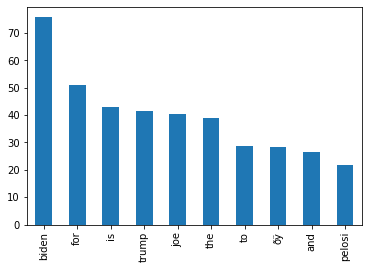

In [198]:
vals = vals[0:10]
vals.plot.bar()

<AxesSubplot:>

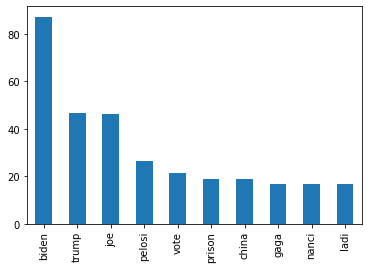

In [199]:
vals1 = vals1[0:10]
vals1.plot.bar()

#### TFIDF on Hate Speech

In [200]:
vectorizer = TfidfVectorizer()
hSpe = vectorizer.fit_transform(hSpeech['message'])
features = vectorizer.get_feature_names()

df = pd.DataFrame(hSpe.toarray(), columns=features)
vals = df.sum(axis = 0, skipna = True)
vals = vals.sort_values(ascending=False)

In [201]:
#stop words removed
vectorizer = TfidfVectorizer()
hSpe = vectorizer.fit_transform(hSpeech['stop_words'])
features = vectorizer.get_feature_names()

df1 = pd.DataFrame(hSpe.toarray(), columns=features)
vals1 = df1.sum(axis = 0, skipna = True)
vals1 = vals1.sort_values(ascending=False)

<AxesSubplot:>

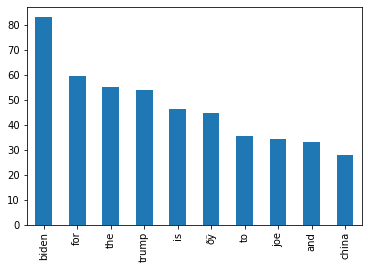

In [202]:
vals = vals[0:10]
vals.plot.bar()

<AxesSubplot:>

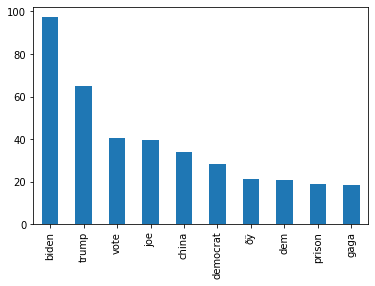

In [203]:
vals1 = vals1[0:10]
vals1.plot.bar()

#### TFIDF on Sexual Harassment

In [204]:
vectorizer = TfidfVectorizer()
sHar = vectorizer.fit_transform(sHarassment['message'])
features = vectorizer.get_feature_names()

df = pd.DataFrame(sHar.toarray(), columns=features)
vals = df.sum(axis = 0, skipna = True)
vals = vals.sort_values(ascending=False)

In [205]:
#stop words removed
vectorizer = TfidfVectorizer()
sHar = vectorizer.fit_transform(sHarassment['stop_words'])
features = vectorizer.get_feature_names()

df1 = pd.DataFrame(sHar.toarray(), columns=features)
vals1 = df1.sum(axis = 0, skipna = True)
vals1 = vals1.sort_values(ascending=False)

<AxesSubplot:>

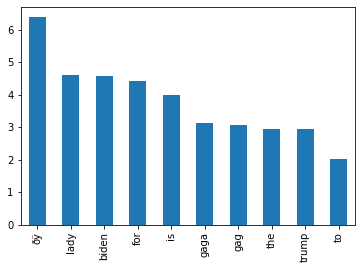

In [206]:
vals = vals[0:10]
vals.plot.bar()

<AxesSubplot:>

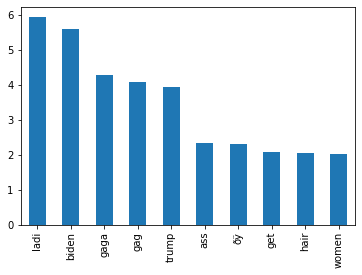

In [207]:
vals1 = vals1[0:10]
vals1.plot.bar()

#### TFIDF on Trolling

In [208]:
vectorizer = TfidfVectorizer()
troll = vectorizer.fit_transform(trolling['message'])
features = vectorizer.get_feature_names()

df = pd.DataFrame(troll.toarray(), columns=features)
vals = df.sum(axis = 0, skipna = True)
vals = vals.sort_values(ascending=False)

In [209]:
#stop words removed
vectorizer = TfidfVectorizer()
troll = vectorizer.fit_transform(trolling['stop_words'])
features = vectorizer.get_feature_names()

df1 = pd.DataFrame(troll.toarray(), columns=features)
vals1 = df1.sum(axis = 0, skipna = True)
vals1 = vals1.sort_values(ascending=False)

<AxesSubplot:>

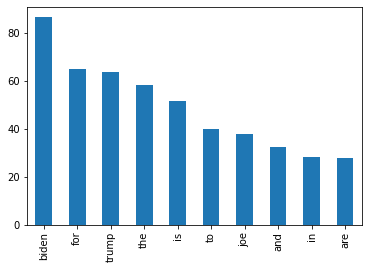

In [210]:
vals = vals[0:10]
vals.plot.bar()

<AxesSubplot:>

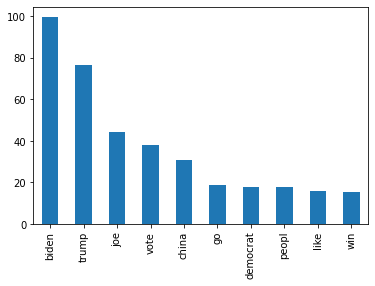

In [211]:
vals1 = vals1[0:10]
vals1.plot.bar()

#### TFIDF on Others

In [212]:
vectorizer = TfidfVectorizer()
oth = vectorizer.fit_transform(others['message'])
features = vectorizer.get_feature_names()

df = pd.DataFrame(oth.toarray(), columns=features)
vals = df.sum(axis = 0, skipna = True)
vals = vals.sort_values(ascending=False)

In [213]:
#stop words removed
vectorizer = TfidfVectorizer()
oth = vectorizer.fit_transform(others['stop_words'])
features = vectorizer.get_feature_names()

df1 = pd.DataFrame(oth.toarray(), columns=features)
vals1 = df1.sum(axis = 0, skipna = True)
vals1 = vals1.sort_values(ascending=False)

<AxesSubplot:>

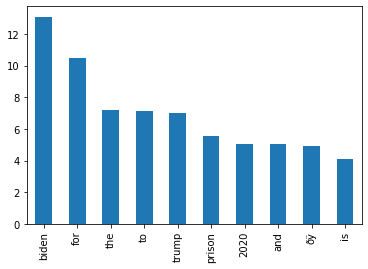

In [214]:
vals = vals[0:10]
vals.plot.bar()

<AxesSubplot:>

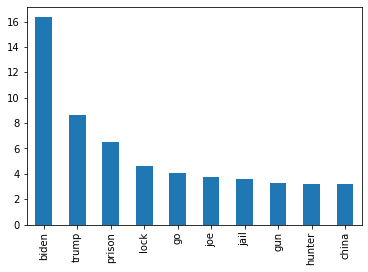

In [215]:
vals1 = vals1[0:10]
vals1.plot.bar()

#### TFIDF on Toxic

In [216]:
vectorizer = TfidfVectorizer()
tox = vectorizer.fit_transform(toxic['message'])
features = vectorizer.get_feature_names()

df = pd.DataFrame(tox.toarray(), columns=features)
vals = df.sum(axis = 0, skipna = True)
vals = vals.sort_values(ascending=False)

In [217]:
#stop words removed
vectorizer = TfidfVectorizer()
tox = vectorizer.fit_transform(toxic['stop_words'])
features = vectorizer.get_feature_names()

df1 = pd.DataFrame(tox.toarray(), columns=features)
vals1 = df1.sum(axis = 0, skipna = True)
vals1 = vals1.sort_values(ascending=False)

<AxesSubplot:>

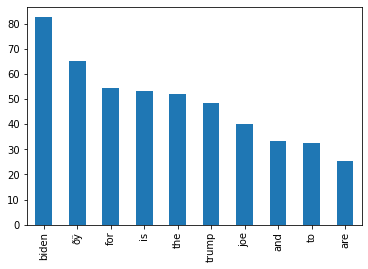

In [218]:
vals = vals[0:10]
vals.plot.bar()

<AxesSubplot:>

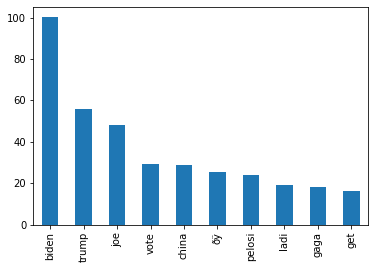

In [219]:
vals1 = vals1[0:10]
vals1.plot.bar()

In [220]:
arr = toxic['message'].to_list()
arr 
len(arr)

1515

In [222]:
results = Detoxify('unbiased').predict(arr[1])
newDF = pd.DataFrame(results, index=arr).round(5)
newDF

,toxicity,severe_toxicity,obscene,identity_attack,insult,threat,sexual_explicit
💙 BIDE‎N FO‍R RACISM! 💙,0.55508,0.00001,0.0007,0.00058,0.46651,0.00124,0.00023
DEMOCRATS LIES ON VILE MEDIA. ABOUT EVERYTHING. DON'T DO THAT TO OUR CHILDREN,0.55508,0.00001,0.0007,0.00058,0.46651,0.00124,0.00023
"𝗜𝗡 𝗚𝗢𝗗 𝐖𝗘 𝗧𝗥𝗨𝗦𝗧 ,𝗗𝗘𝗙𝗘𝗔𝗧 J𝗢𝗘 𝐖𝗘 𝗠𝗨𝗦𝗧",0.55508,0.00001,0.0007,0.00058,0.46651,0.00124,0.00023
ITS ALL SO FAKE,0.55508,0.00001,0.0007,0.00058,0.46651,0.00124,0.00023
Throw Peters out! Vote John James tomorrow!!,0.55508,0.00001,0.0007,0.00058,0.46651,0.00124,0.00023
...,...,...,...,...,...,...,...
8===3 JOE BIDEN,0.55508,0.00001,0.0007,0.00058,0.46651,0.00124,0.00023
ðŸ‘FRIENDS DON'T LET FRIENDS VOTE FOR A CAREER CORRUPT POLITICIAN THAT IS NOW BRAINLESS #DUMPJOE #BASEMENTBIDEN #TELEPROMPTERJOE ðŸ‘,0.55508,0.00001,0.0007,0.00058,0.46651,0.00124,0.00023
"Pelosi, Schumer, Feinschtein, Biden, Leahy and Maxine Waters all became rich in politics while you got poorer, entrenched corrupt leeches, TIME FOR THEM TO GO - VOTE RED",0.55508,0.00001,0.0007,0.00058,0.46651,0.00124,0.00023
CLOWN,0.55508,0.00001,0.0007,0.00058,0.46651,0.00124,0.00023
